In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from collections import defaultdict

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [240]:
WDIR = '/content/drive/MyDrive/_MVA/Smartflat/'
raw_data = pd.read_excel(WDIR + 'Metrics par patient.xlsx')

In [241]:
raw_data.head()

,Identité,Participant,Class,Age,Sexe,diagnostic,Average duration of whole fixations,Number of whole fixations,Number of saccades,Average peak velocity of saccades,...,Maximum amplitude of saccades,Total amplitude of saccades,Time to first saccade,Direction of first saccade,Peak velocity of first saccade,Average velocity of first saccade,Amplitude of first saccade,Minimum peak velocity of saccades,Maximum peak velocity of saccades,Standard deviation of peak velocity of saccades
0,G1_C1_BARMar_22022017,1.0,Contrôle,29,F,Contrôle,200.0,2290.0,1244.0,139.09,...,31.40,5398.52,105.0,31.46,280.42,161.24,6.71,30.04,825.81,120.94
1,G2_P1_LEBAla_23022017,2.0,Patient,57,H,LPR,124.0,1555.0,427.0,106.42,...,18.88,908.94,375.0,39.24,81.61,75.67,1.79,30.00,1416.50,124.05
2,G3_C2_FORCla_27022017,3.0,Contrôle,40,F,Contrôle,243.0,3979.0,2909.0,183.33,...,30.50,13601.63,775.0,270.97,228.32,153.85,6.33,30.02,1240.43,144.64
3,G4_P2_CHANic_02032017,4.0,Patient,67,F,LPR,180.0,2178.0,904.0,111.46,...,35.74,2196.99,8606.0,58.69,33.41,33.41,0.52,30.02,1682.88,175.61
4,G5_C3_FAKAzi_03032017,5.0,Contrôle,70,H,Contrôle,323.0,3497.0,2572.0,136.58,...,36.56,11451.62,245.0,166.80,265.57,154.23,7.61,30.05,898.65,115.26


In [242]:
features = raw_data.iloc[:, 7:]
features = features.drop(columns=['Lunettes', 'BNP', 'Score Gateau'])
features.head()

,Number of whole fixations,Number of saccades,Average peak velocity of saccades,Average amplitude of saccades,Interval duration,Total duration of whole fixations,Duration of first whole fixation,Minimum amplitude of saccades,Maximum amplitude of saccades,Total amplitude of saccades,Time to first saccade,Direction of first saccade,Peak velocity of first saccade,Average velocity of first saccade,Amplitude of first saccade,Minimum peak velocity of saccades,Maximum peak velocity of saccades,Standard deviation of peak velocity of saccades
0,2290.0,1244.0,139.09,4.34,1742640.0,456931.0,110.0,0.51,31.40,5398.52,105.0,31.46,280.42,161.24,6.71,30.04,825.81,120.94
1,1555.0,427.0,106.42,2.13,2476972.0,192170.0,320.0,0.32,18.88,908.94,375.0,39.24,81.61,75.67,1.79,30.00,1416.50,124.05
2,3979.0,2909.0,183.33,4.68,1441998.0,966244.0,160.0,0.30,30.50,13601.63,775.0,270.97,228.32,153.85,6.33,30.02,1240.43,144.64
3,2178.0,904.0,111.46,2.43,2499000.0,392181.0,110.0,0.13,35.74,2196.99,8606.0,58.69,33.41,33.41,0.52,30.02,1682.88,175.61
4,3497.0,2572.0,136.58,4.45,1655932.0,1129768.0,140.0,0.51,36.56,11451.62,245.0,166.80,265.57,154.23,7.61,30.05,898.65,115.26


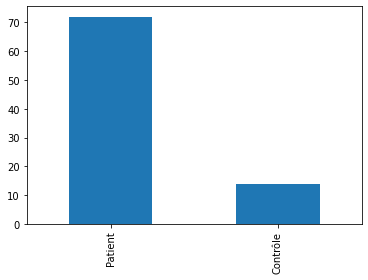

In [243]:
target = raw_data.loc[:, 'Class']
target.value_counts().plot(kind='bar')

In [244]:
X = features.dropna(how='any')
y = target.loc[X.index]

X = (X - X.min()) / (X.max()-X.min())

le = LabelEncoder()
y = le.fit_transform(y)

## Logistic Regression feature importances

In [245]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(X, y)

accuracy_score(y, clf.predict(X))

0.7051282051282052

Number of whole fixations:  -0.16
Number of saccades:  -0.74
Average peak velocity of saccades:  -0.24
Average amplitude of saccades:  -0.65
Interval duration:  0.17
Total duration of whole fixations:  -0.37
Duration of first whole fixation:  0.54
Minimum amplitude of saccades:  -0.81
Maximum amplitude of saccades:  -0.09
Total amplitude of saccades:  -1.09
Time to first saccade:  -0.22
Direction of first saccade:  -0.69
Peak velocity of first saccade:  -0.18
Average velocity of first saccade:  -0.16
Amplitude of first saccade:  -0.01
Minimum peak velocity of saccades:  0.55
Maximum peak velocity of saccades:  0.39
Standard deviation of peak velocity of saccades:  0.07


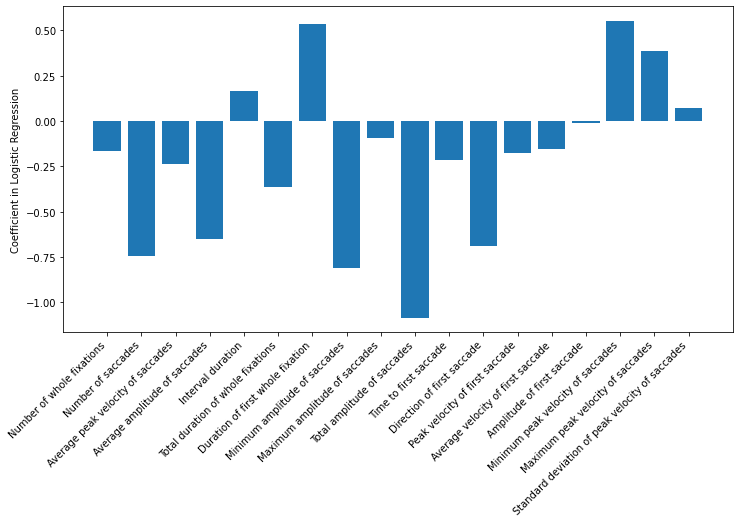

In [246]:
for i, coef in enumerate(clf.coef_[0]):
  print(f'{features.columns[i]}: ', '{0:.2f}'.format(coef))

plt.figure(figsize=(12,6))
plt.bar(features.columns, clf.coef_[0])
plt.xticks(rotation=45, ha="right")
plt.ylabel('Coefficient in Logistic Regression')
plt.show()

## Random forest features importance

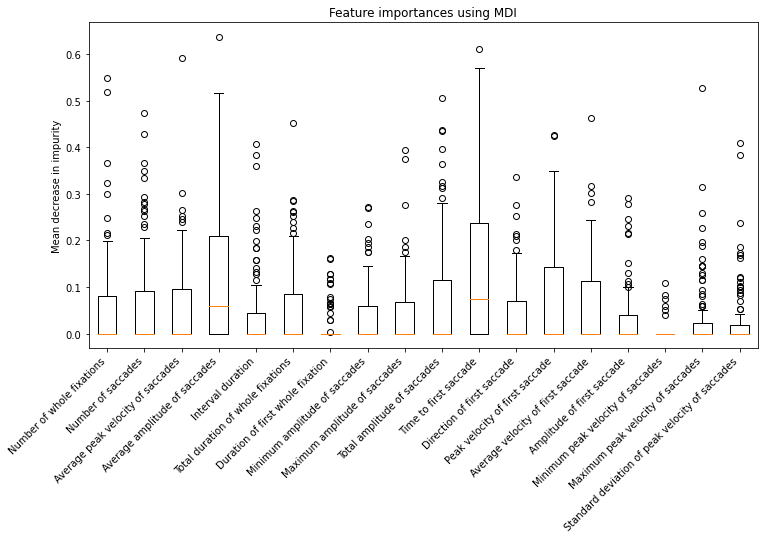

In [247]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features.columns)
tree_importances = pd.DataFrame([tree.feature_importances_ for tree in forest.estimators_], columns=features.columns)


plt.figure(figsize=(12,6))
#forest_importances.plot.bar(yerr=std)
plt.boxplot(tree_importances.T, labels=features.columns)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=45, ha="right")
plt.show()

## Permutation feature importance

Interval duration : -0.000 +/- 0.004
Duration of first whole fixation : -0.001 +/- 0.017
Minimum amplitude of saccades : -0.004 +/- 0.025
Standard deviation of peak velocity of saccades : -0.006 +/- 0.008
Minimum peak velocity of saccades : -0.007 +/- 0.010
Time to first saccade : -0.009 +/- 0.009
Amplitude of first saccade : -0.012 +/- 0.004
Peak velocity of first saccade : -0.015 +/- 0.014
Average velocity of first saccade : -0.016 +/- 0.015
Maximum peak velocity of saccades : -0.016 +/- 0.017
Total amplitude of saccades : -0.016 +/- 0.031
Maximum amplitude of saccades : -0.020 +/- 0.010
Direction of first saccade : -0.022 +/- 0.024
Average peak velocity of saccades : -0.029 +/- 0.013
Number of saccades : -0.032 +/- 0.026
Total duration of whole fixations : -0.035 +/- 0.017
Number of whole fixations : -0.037 +/- 0.011
Average amplitude of saccades : -0.040 +/- 0.023


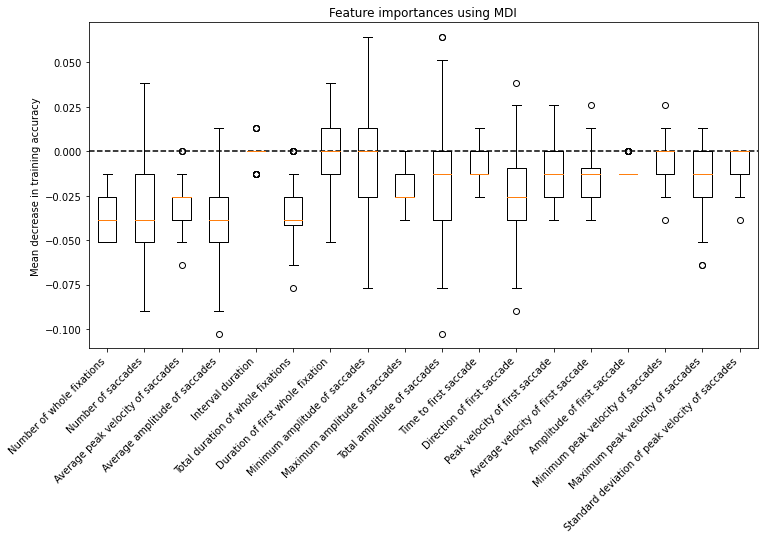

In [248]:
r = permutation_importance(clf, X, y,
                           n_repeats=100,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
      print(f"{features.columns[i]:<8} : "
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")
    

plt.figure(figsize=(12,6))
plt.boxplot(r.importances.T, labels=features.columns)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in training accuracy")
plt.xticks(rotation=45, ha="right")
plt.axhline(y=0, color="k", linestyle="--")
plt.show()

# Removing multicollinearity

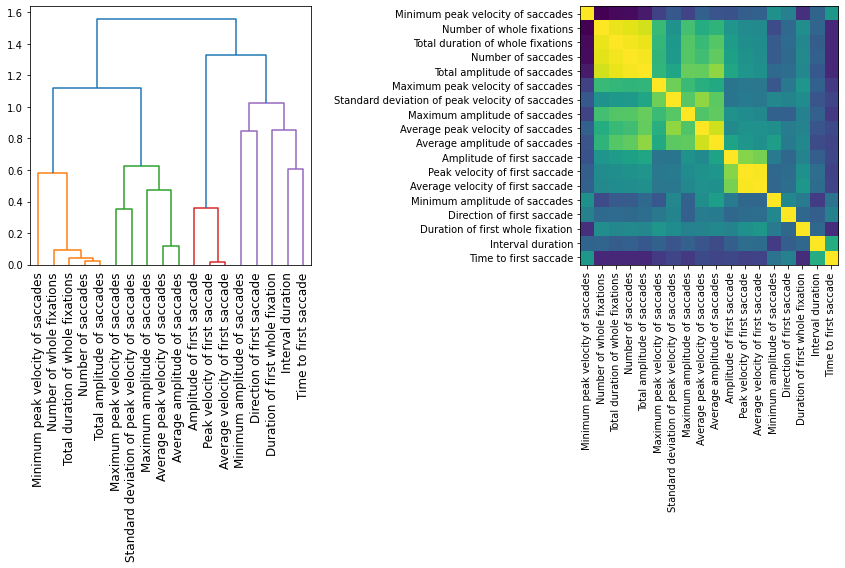

In [249]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=features.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [250]:
cluster_ids = hierarchy.fcluster(dist_linkage, 0.2, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_sel = X.iloc[:, selected_features]

clf_sel = LogisticRegression(class_weight='balanced')
clf_sel.fit(X_sel, y)
print("Accuracy with features removed: {:.2f}".format(clf_sel.score(X_sel, y)))

Accuracy with features removed: 0.67


Number of whole fixations:  -0.98
Average peak velocity of saccades:  -0.81
Interval duration:  0.22
Duration of first whole fixation:  0.41
Minimum amplitude of saccades:  -0.96
Maximum amplitude of saccades:  -0.53
Time to first saccade:  0.02
Direction of first saccade:  -0.72
Peak velocity of first saccade:  -0.40
Amplitude of first saccade:  -0.32
Minimum peak velocity of saccades:  0.59
Maximum peak velocity of saccades:  0.22
Standard deviation of peak velocity of saccades:  -0.04


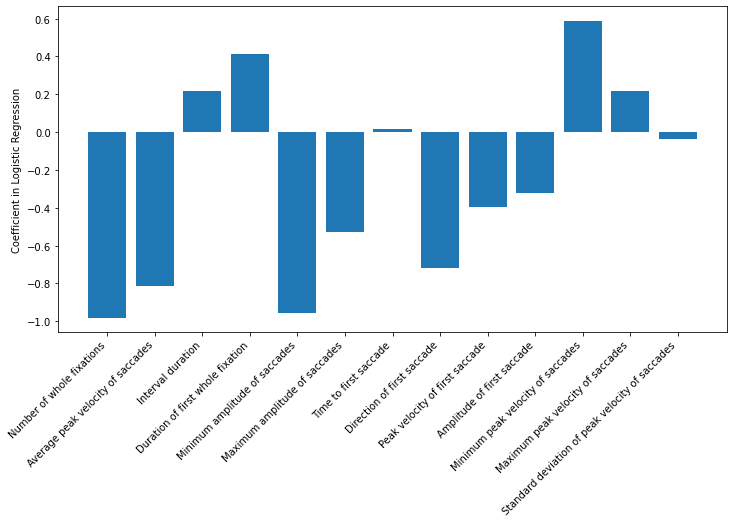

In [251]:
for i, coef in enumerate(clf_sel.coef_[0]):
  print(f'{features.columns[selected_features[i]]}: ', '{0:.2f}'.format(coef))

plt.figure(figsize=(12,6))
plt.bar(features.columns[selected_features], clf_sel.coef_[0])
plt.xticks(rotation=45, ha="right")
plt.ylabel('Coefficient in Logistic Regression')
plt.show()

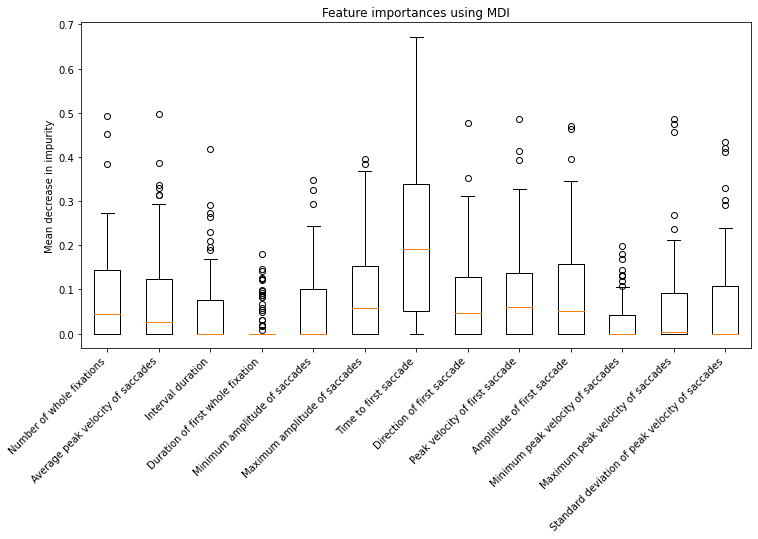

In [252]:
forest = RandomForestClassifier()
forest.fit(X_sel, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features.columns[selected_features])
tree_importances = pd.DataFrame([tree.feature_importances_ for tree in forest.estimators_], columns=features.columns[selected_features])


plt.figure(figsize=(12,6))
#forest_importances.plot.bar(yerr=std)
plt.boxplot(tree_importances.T, labels=features.columns[selected_features])
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=45, ha="right")
plt.show()

Time to first saccade : 0.007 +/- 0.010
Direction of first saccade : 0.001 +/- 0.012
Interval duration : -0.000 +/- 0.031
Duration of first whole fixation : -0.000 +/- 0.002
Average peak velocity of saccades : -0.001 +/- 0.005
Average amplitude of saccades : -0.003 +/- 0.014
Peak velocity of first saccade : -0.005 +/- 0.006
Minimum amplitude of saccades : -0.010 +/- 0.028
Total amplitude of saccades : -0.010 +/- 0.018
Number of whole fixations : -0.010 +/- 0.032
Maximum amplitude of saccades : -0.018 +/- 0.020
Total duration of whole fixations : -0.028 +/- 0.023
Number of saccades : -0.037 +/- 0.025


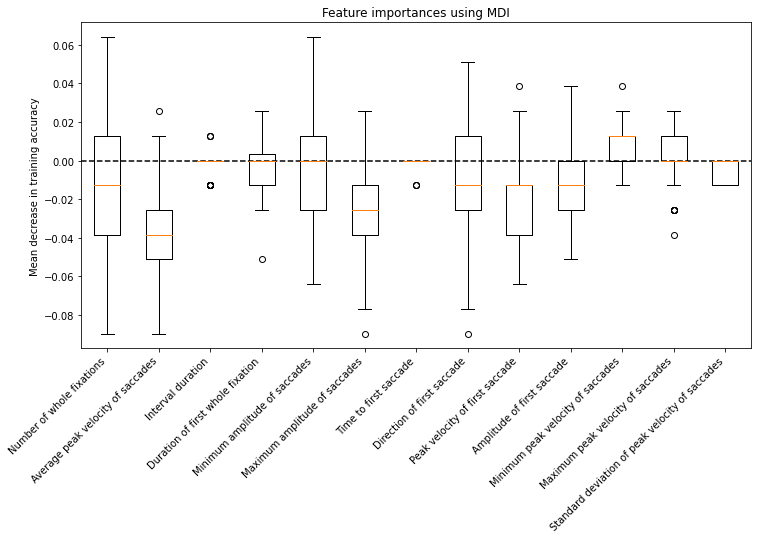

In [253]:
r = permutation_importance(clf_sel, X_sel, y,
                           n_repeats=100,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
      print(f"{features.columns[i]:<8} : "
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")
    

plt.figure(figsize=(12,6))
plt.boxplot(r.importances.T, labels=features.columns[selected_features])
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in training accuracy")
plt.xticks(rotation=45, ha="right")
plt.axhline(y=0, color="k", linestyle="--")
plt.show()